In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
data=pd.read_csv("(Dataset)IIIT Pune Student Mood in the era of Online Learning .csv")

In [3]:
data["PHQ-9 Score"]=0
for x in data.columns[24:33]:
    data["PHQ-9 Score"]+=data[x]-1

data["GAD-7 Score"]=0
for x in data.columns[17:24]:
    data["GAD-7 Score"]+=data[x]-1

In [4]:
data["Depression Severity"]=""
c=0
for x in data["PHQ-9 Score"]:
    if x>19 :
        data["Depression Severity"][c]="Severe"
    elif x>14:
        data["Depression Severity"][c]="Moderately Severe"
    elif x>9:
        data["Depression Severity"][c]="Moderate"
    elif x>4:
        data["Depression Severity"][c]="Mild"
    else :
        data["Depression Severity"][c]="None-minimal"
    c+=1

In [5]:
data["Anxiety Severity"]=""
c=0
for x in data["GAD-7 Score"]:
    if x>14:
        data["Anxiety Severity"][c]="Severe"
    elif x>9:
        data["Anxiety Severity"][c]="Moderate"
    elif x>4:
        data["Anxiety Severity"][c]="Mild"
    else :
        data["Anxiety Severity"][c]="Minimal"
    c+=1

In [6]:
c=0
for x in data.columns:
    print(c,":",data[x].dtypes,":",x)
    c+=1

0 : object : Timestamp
1 : object : Choose your course type.
2 : object : Which year BTech student are you ?
3 : float64 : Which year MTech student are you?
4 : object : Which branch are you enrolled in ?
5 : object : What is your gender ?
6 : int64 : What is your age ? ( in years)
7 : object : Did you have to frequently change school in your schooldays ?
8 : object : Do you live in a rented accommodation ?
9 : float64 : Provide your height in cms . (only number)
10 : float64 : Provide your weight in Kgs .(only number)
11 : int64 : How many siblings are you in total ? (including you)
12 : object : Do you live with a single parent/guardian ?
13 : object : Do both of your parents work ?
14 : object : Do you smoke ?
15 : object : Are you specially abled ?
16 : object : Have you ever been constantly bullied by someone ?
17 : int64 : 1. Feeling nervous, anxious or on edge .
18 : int64 : 2. Not being able to stop or control worrying .
19 : int64 : 3.Worrying too much about different things .

In [7]:
data.drop("Timestamp",axis=1,inplace=True)

In [8]:
valid_participants=len(data.index)

In [9]:
valid_participants=0
def absolute_num(x):
    global valid_participants
    return "{:.1f}% ({})".format(x,round(x*valid_participants/100))

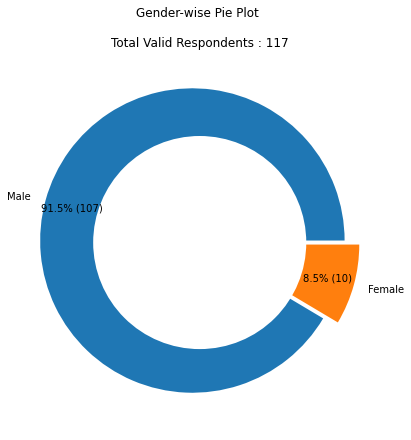

In [18]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["What is your gender ?"])

plt.pie(data["What is your gender ?"].value_counts(),labels=["Male","Female"],autopct=absolute_num,startangle=0,pctdistance=0.82,explode=(0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Gender-wise Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

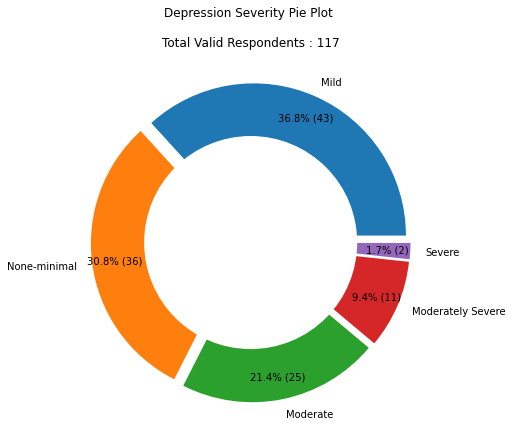

In [10]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Depression Severity"])

plt.pie(data["Depression Severity"].value_counts(),labels=["Mild","None-minimal","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

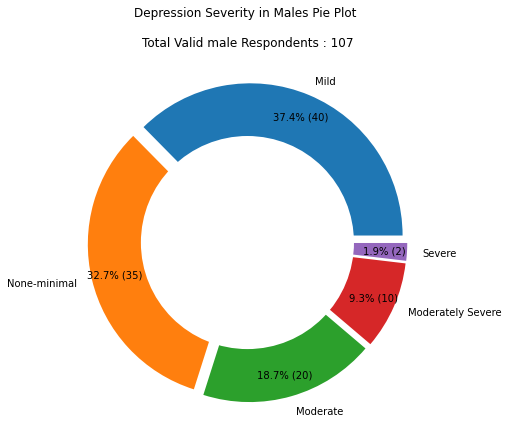

In [11]:
datam=data[data["What is your gender ?"]=="Male"]["Depression Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(datam)

plt.pie(datam.value_counts(),labels=["Mild","None-minimal","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity in Males Pie Plot \n\nTotal Valid male Respondents : "+str(valid_participants))
plt.show()

In [12]:
dataf=data[data["What is your gender ?"]=="Female"]["Depression Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(datam)

plt.pie(dataf.value_counts(),labels=["Mild","None-minimal","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity in Females Pie Plot \n\nTotal Valid female Respondents : "+str(valid_participants))
plt.show()

ValueError: 'label' must be of length 'x'

In [22]:
data["PHQ-9 Score"].describe()

count    117.000000
mean       7.478632
std        4.995857
min        0.000000
25%        3.000000
50%        7.000000
75%       11.000000
max       23.000000
Name: PHQ-9 Score, dtype: float64

In [23]:
data["PHQ-9 Score"].value_counts().sort_index()

0      8
1      6
2      7
3     10
4      5
5      9
6      9
7      6
8     11
9      8
10     7
11     7
12     6
13     3
14     2
15     7
17     2
18     2
20     1
23     1
Name: PHQ-9 Score, dtype: int64

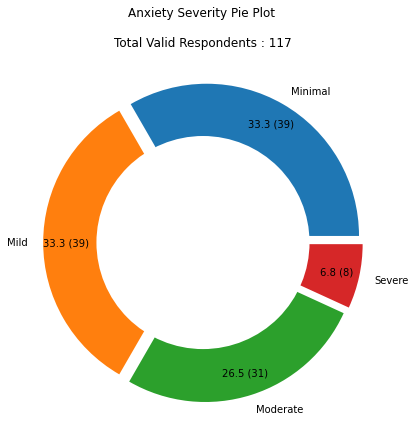

In [63]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Anxiety Severity"])

plt.pie(data["Anxiety Severity"].value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

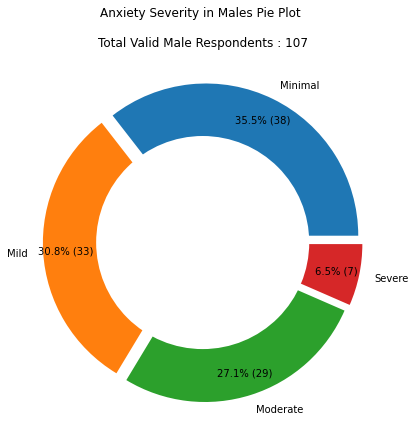

In [16]:
datam=data[data["What is your gender ?"]=="Male"]["Anxiety Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(datam)

plt.pie(datam.value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity in Males Pie Plot \n\nTotal Valid Male Respondents : "+str(valid_participants))
plt.show()

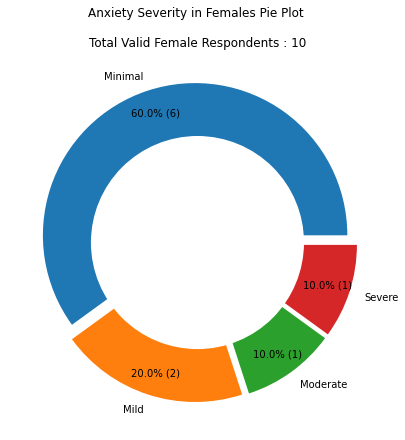

In [15]:
dataf=data[data["What is your gender ?"]=="Female"]["Anxiety Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(dataf)

plt.pie(dataf.value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity in Females Pie Plot \n\nTotal Valid Female Respondents : "+str(valid_participants))
plt.show()

In [25]:
data["GAD-7 Score"].describe()

count    117.000000
mean       7.136752
std        4.732328
min        0.000000
25%        3.000000
50%        7.000000
75%       11.000000
max       21.000000
Name: GAD-7 Score, dtype: float64

In [26]:
data["GAD-7 Score"].value_counts().sort_index()

0      4
1     14
2      8
3      4
4      9
5     10
6      5
7      9
8      8
9      7
10     9
11     8
12    11
13     3
15     3
16     1
17     1
19     1
20     1
21     1
Name: GAD-7 Score, dtype: int64

In [27]:
ord_cols=[x for x in data.columns if data[x].dtypes==object ]

In [28]:
dh=data[ord_cols].replace({"Yes":1,"No":0,"First Year":1,"Second Year":2,"Third Year":3,"Fourth Year":4,"Male":1,"Female":0,"BTech":0,"MTech":1,"Computer Science and Engineering":0,"Electronics Communication and Engineering":1})

In [29]:
sf=[x for x in data.columns if x not in ord_cols]
data=pd.concat([data[sf],dh],axis=1)

In [30]:
ord_cols=[x for x in data.columns if data[x].dtypes==object]

In [31]:
ordEnc=OrdinalEncoder()
data_ord_enc=ordEnc.fit_transform(data[ord_cols])
df=pd.DataFrame(data_ord_enc)
df.columns=ord_cols
ndata=pd.concat([data,df],axis=1)

In [32]:
ndata

,Which year MTech student are you?,What is your age ? ( in years),Provide your height in cms . (only number),Provide your weight in Kgs .(only number),How many siblings are you in total ? (including you),"1. Feeling nervous, anxious or on edge .",2. Not being able to stop or control worrying .,3.Worrying too much about different things .,4. Having trouble in relaxing .,5. Being so restless that it is hard to sit still .,...,Do you live in a rented accommodation ?,Do you live with a single parent/guardian ?,Do both of your parents work ?,Do you smoke ?,Are you specially abled ?,Have you ever been constantly bullied by someone ?,Depression Severity,Anxiety Severity,Depression Severity,Anxiety Severity
0,NaN,20,183.0,78.0,2,1,3,2,2,3,...,0,0,0,0,0,0,Mild,Moderate,0.0,2.0
1,NaN,18,156.0,65.0,1,2,1,2,1,2,...,1,0,0,0,0,0,None-minimal,Minimal,3.0,1.0
2,NaN,20,167.5,51.0,2,1,1,2,2,2,...,1,0,0,0,0,0,Mild,Minimal,0.0,1.0
3,NaN,18,181.0,88.0,1,2,2,2,2,2,...,0,0,1,0,0,0,Moderate,Mild,1.0,0.0
4,NaN,18,165.0,61.0,4,1,2,2,3,2,...,0,0,1,0,0,0,Mild,Mild,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,19,174.0,86.0,1,4,4,4,4,4,...,0,0,0,0,0,0,Moderate,Severe,1.0,3.0
113,NaN,19,177.8,74.6,2,1,1,1,1,3,...,0,0,1,0,0,0,Mild,Mild,0.0,0.0
114,NaN,17,173.0,70.0,2,2,2,3,2,2,...,0,1,0,0,0,0,Mild,Mild,0.0,0.0
115,NaN,19,168.0,65.0,2,2,2,1,1,1,...,0,0,1,0,0,0,None-minimal,Minimal,3.0,1.0


In [33]:
cm=ndata.corr()
acm=cm.copy()

Text(0.5, 1.0, 'Correlation Heatmap')

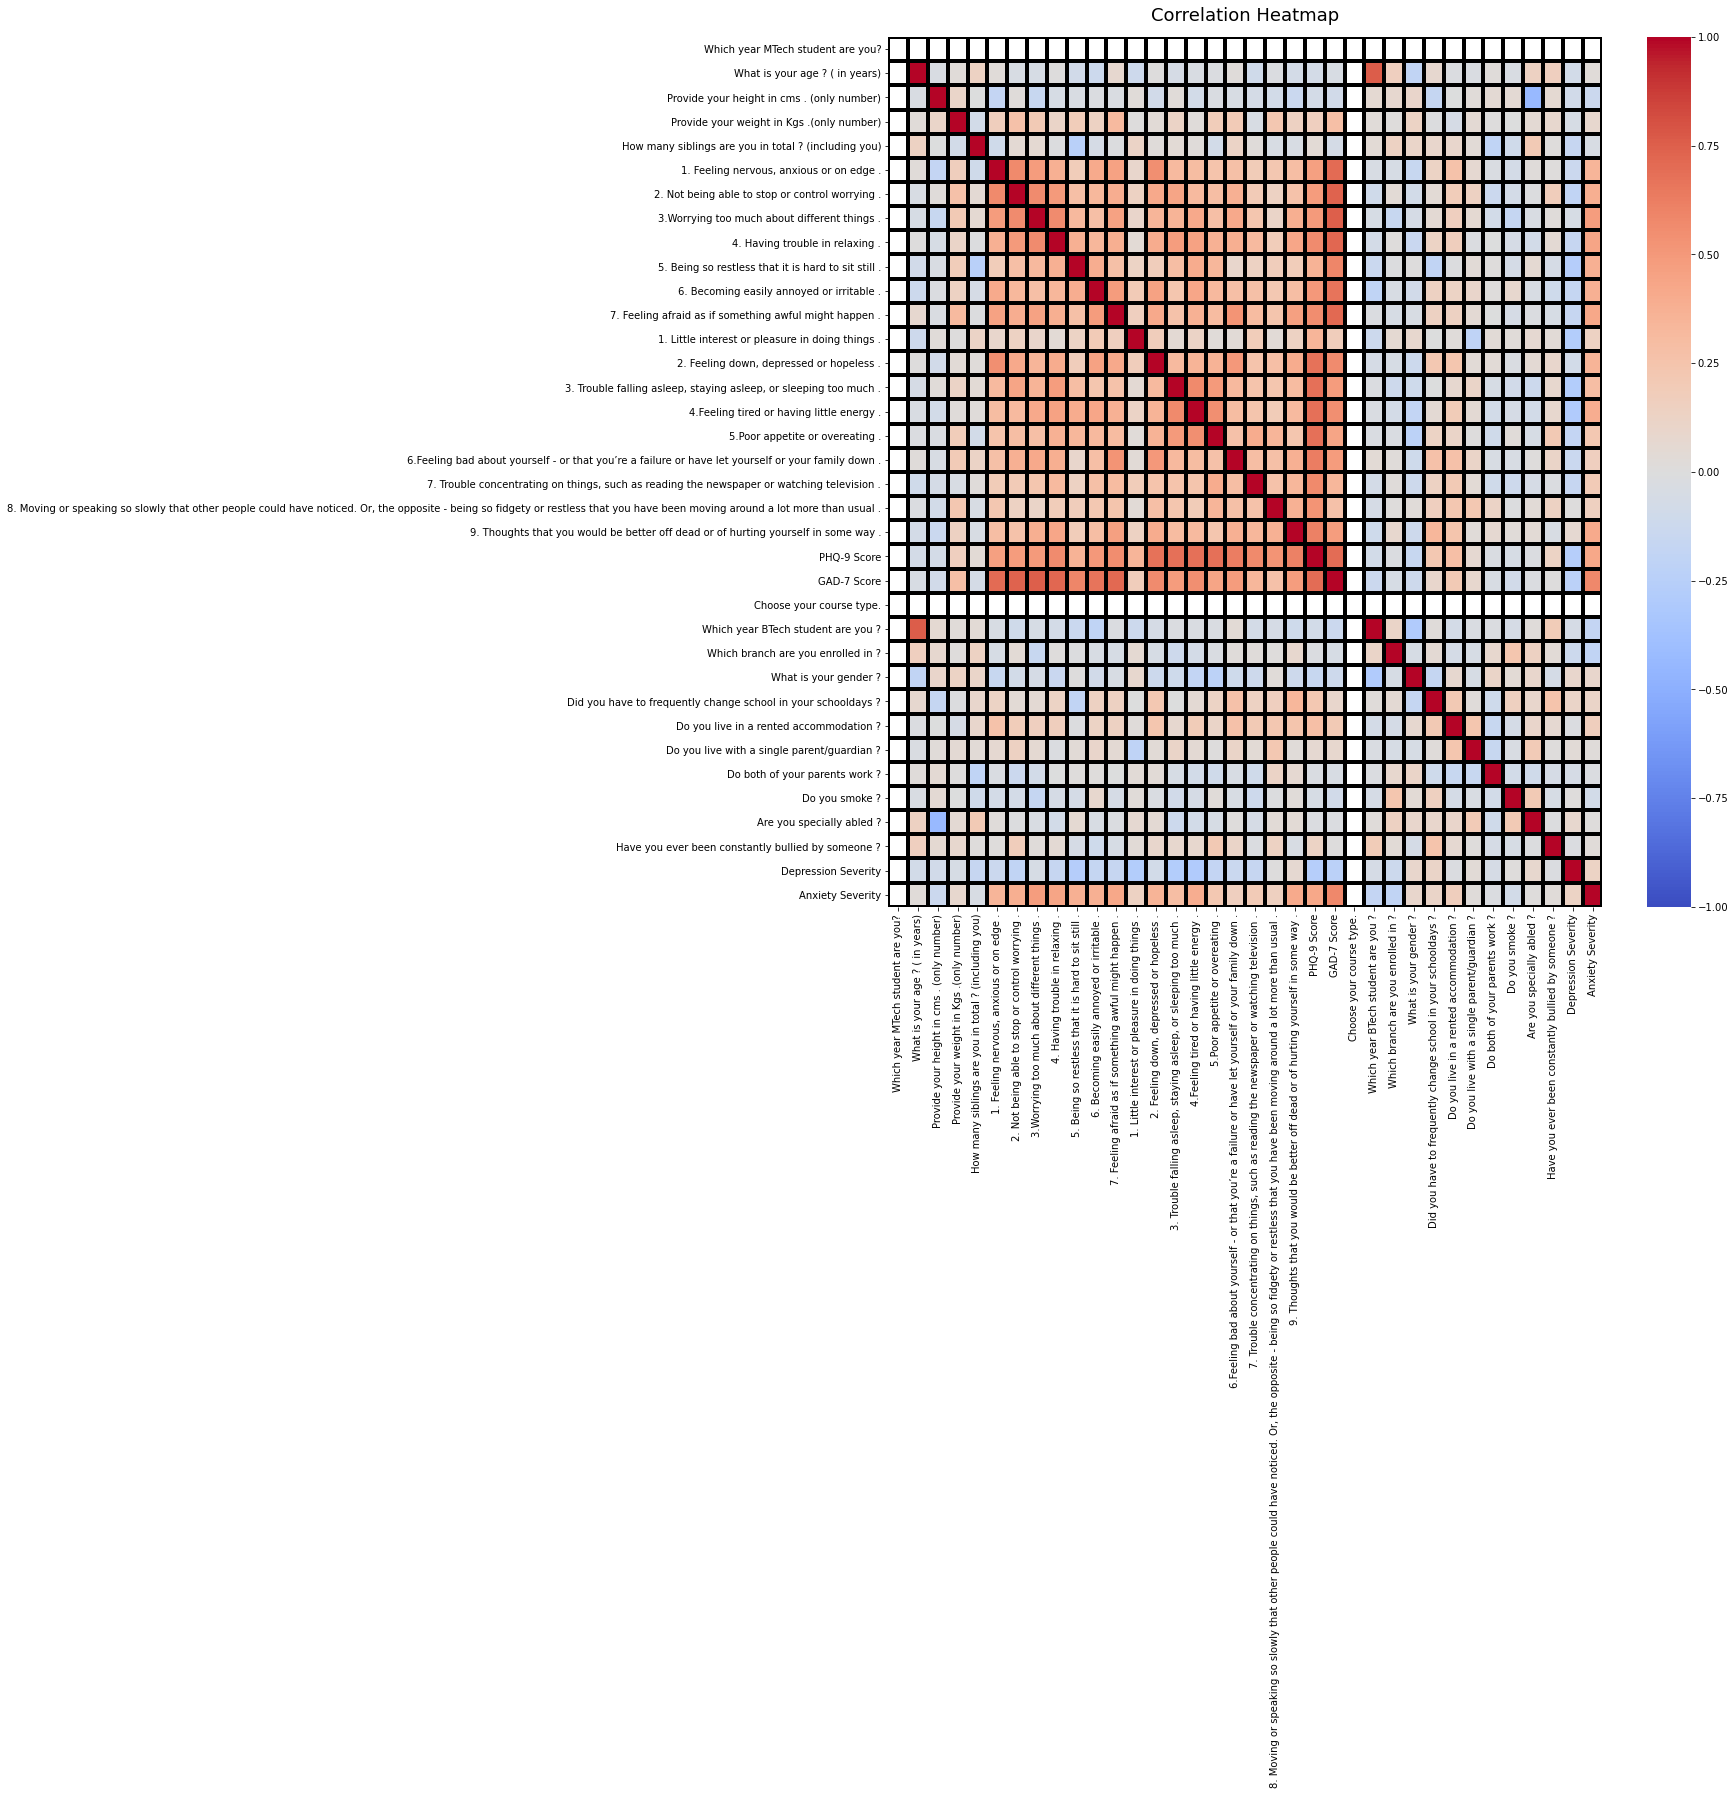

In [34]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(cm,cmap= 'coolwarm',vmin=-1,vmax=1,center=0, linewidths=3, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [35]:
cm["PHQ-9 Score"].sort_values()[-10:]

9. Thoughts that you would be better off dead or of hurting yourself in some way .                    0.610459
6.Feeling bad about yourself - or that you’re a failure or have let yourself or your family down .    0.629290
2. Feeling down, depressed or hopeless .                                                              0.678564
5.Poor appetite or overeating .                                                                       0.679988
3. Trouble falling asleep, staying asleep, or sleeping too much .                                     0.680452
4.Feeling tired or having little energy .                                                             0.685084
GAD-7 Score                                                                                           0.702045
PHQ-9 Score                                                                                           1.000000
Which year MTech student are you?                                                                          NaN
C

In [36]:
cm["GAD-7 Score"].sort_values()[-10:]

6. Becoming easily annoyed or irritable .                 0.665126
PHQ-9 Score                                               0.702045
1. Feeling nervous, anxious or on edge .                  0.707317
7. Feeling afraid as if something awful might happen .    0.716762
4. Having trouble in relaxing .                           0.724822
2. Not being able to stop or control worrying .           0.739863
3.Worrying too much about different things .              0.752291
GAD-7 Score                                               1.000000
Which year MTech student are you?                              NaN
Choose your course type.                                       NaN
Name: GAD-7 Score, dtype: float64

In [37]:
for x in cm:
    for y in cm:
        acm.at[x,y]=abs(cm.at[x,y])

Text(0.5, 1.0, 'Correlation Heatmap')

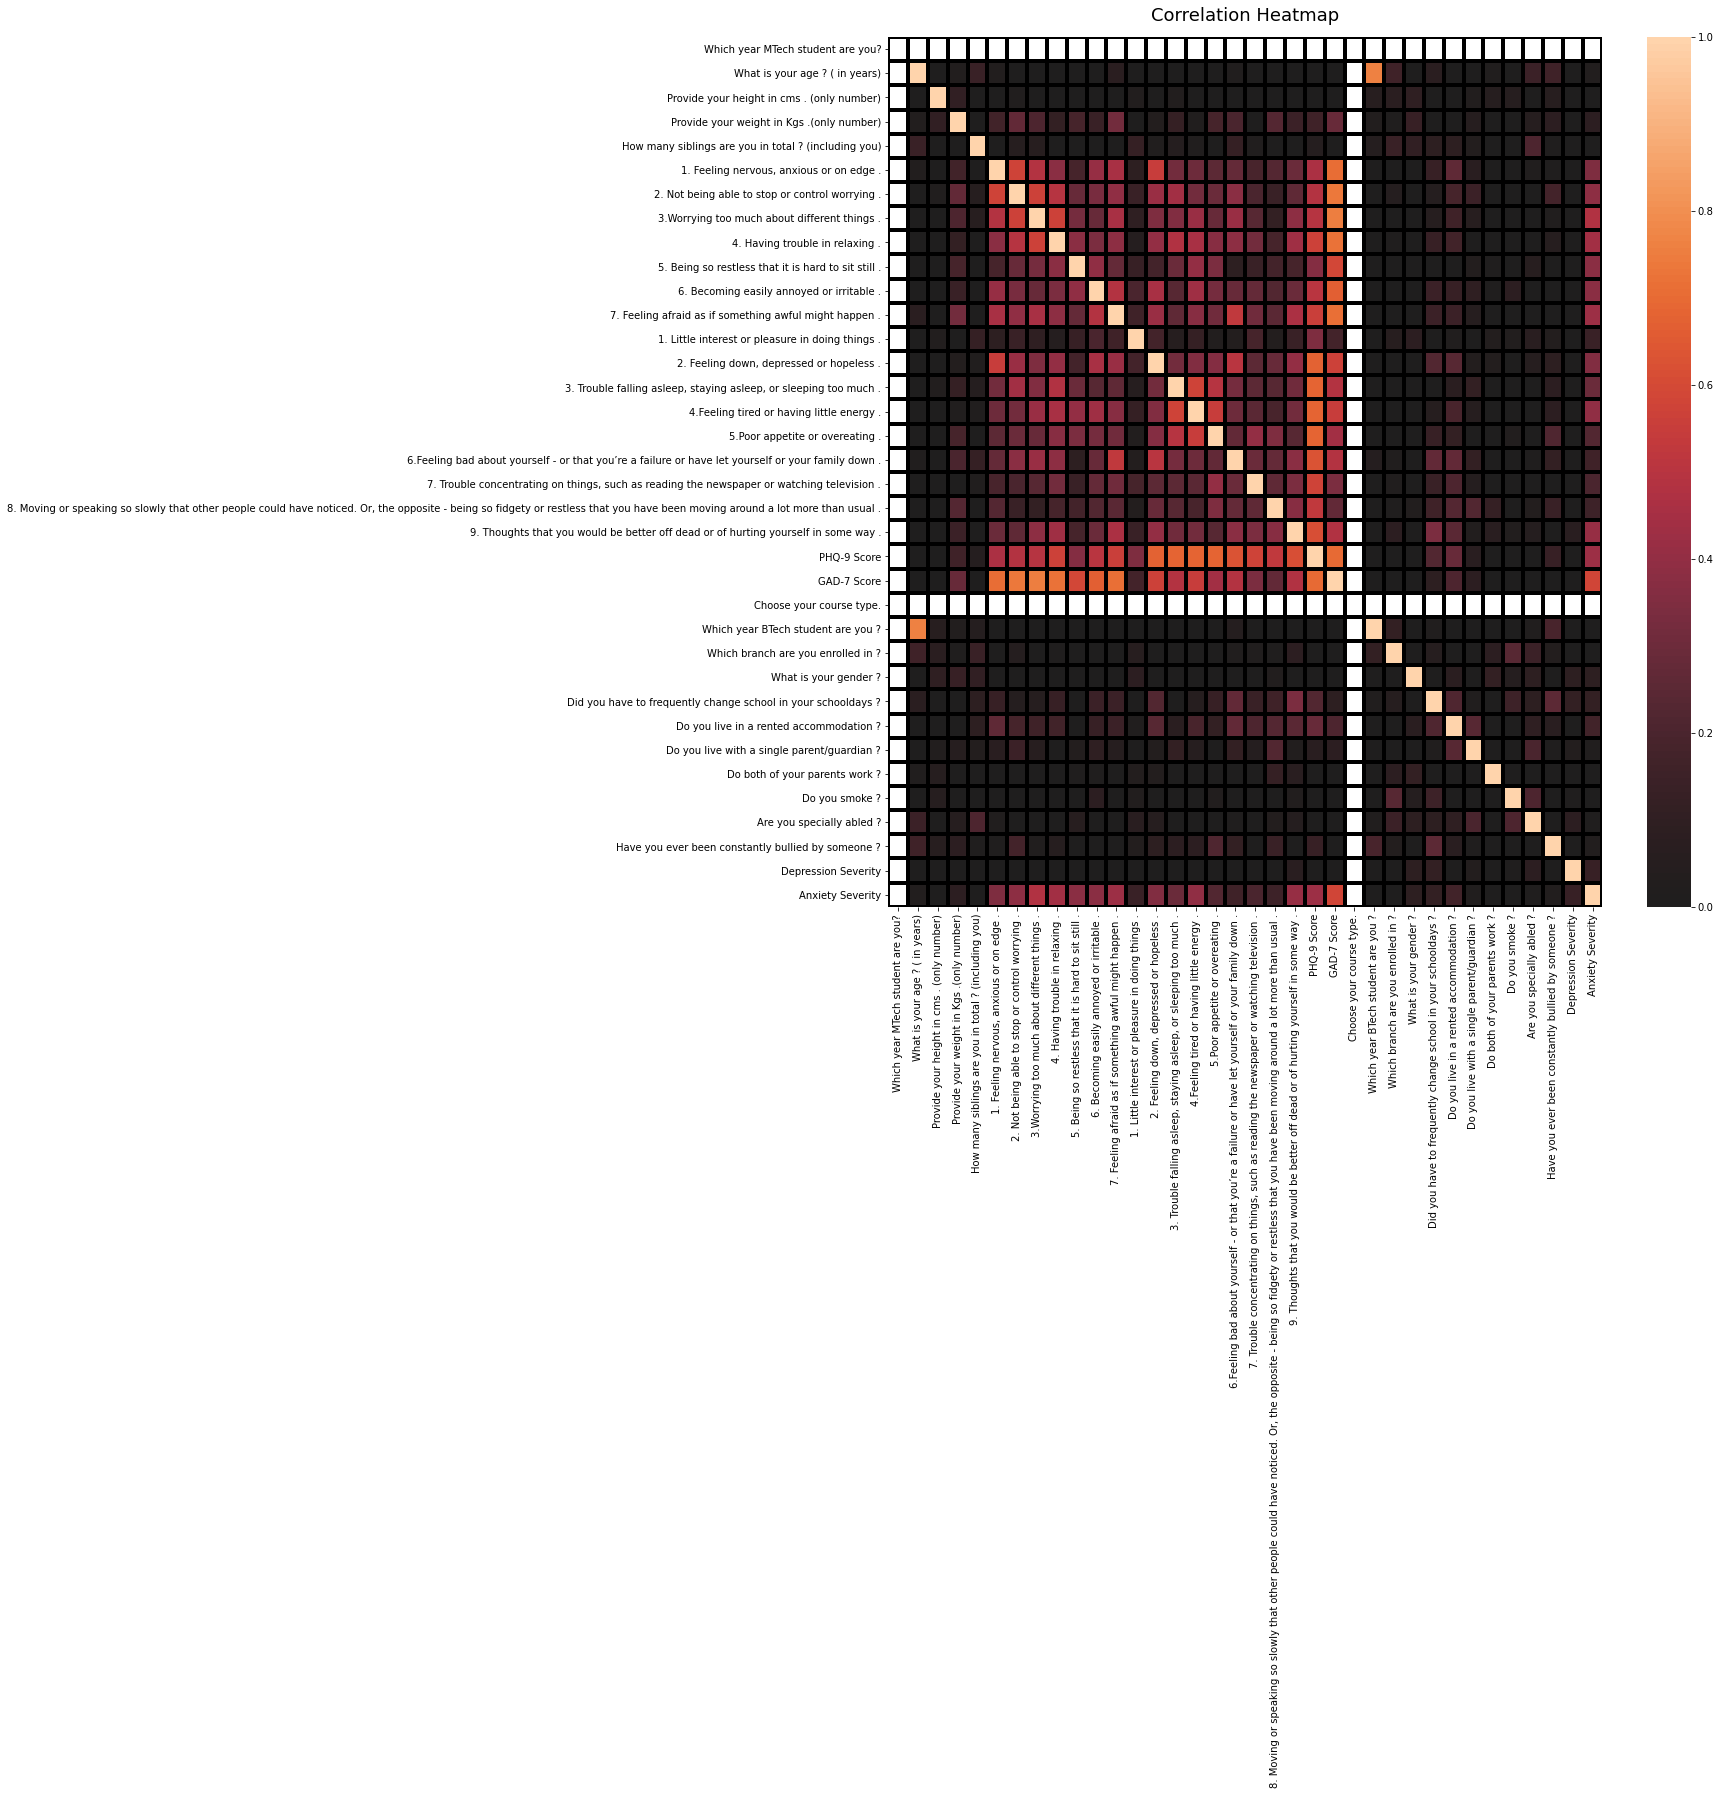

In [38]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(cm,vmin=0,vmax=1,center=0, linewidths=3, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [39]:
acm["PHQ-9 Score"].sort_values()[-9:]

6.Feeling bad about yourself - or that you’re a failure or have let yourself or your family down .    0.629290
2. Feeling down, depressed or hopeless .                                                              0.678564
5.Poor appetite or overeating .                                                                       0.679988
3. Trouble falling asleep, staying asleep, or sleeping too much .                                     0.680452
4.Feeling tired or having little energy .                                                             0.685084
GAD-7 Score                                                                                           0.702045
PHQ-9 Score                                                                                           1.000000
Which year MTech student are you?                                                                          NaN
Choose your course type.                                                                                   NaN
N

In [40]:
acm["GAD-7 Score"].sort_values()[-8:]

1. Feeling nervous, anxious or on edge .                  0.707317
7. Feeling afraid as if something awful might happen .    0.716762
4. Having trouble in relaxing .                           0.724822
2. Not being able to stop or control worrying .           0.739863
3.Worrying too much about different things .              0.752291
GAD-7 Score                                               1.000000
Which year MTech student are you?                              NaN
Choose your course type.                                       NaN
Name: GAD-7 Score, dtype: float64